<a href="https://colab.research.google.com/github/gauravvxv/Employee-Analytics-Dashboard/blob/main/Notebook/Staff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 **Employee Data Analysis & Visualization using Python**

This project focuses on analyzing and visualizing employee data using Python. The objective is to clean raw data, generate meaningful insights, and prepare it for further use in SQL and Power BI dashboards. The dataset includes employee attributes such as name, gender, department, salary, employment type, and join date.

Through this analysis, we aim to:



*   Perform data cleaning and transformation using Python (`pandas`).
*   Explore employee trends such as gender distribution, salary levels, and department breakdown.
*   Identify top earners and salary distribution patterns.
*   Visualize insights using matplotlib and seaborn.



## 🔧 **1. Tools & Libraries Used:**



*   Python

*   pandas for data manipulation

*   matplotlib & seaborn for visualization




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 🏬 **2. Load Dataset**

In [3]:
path = 'https://raw.githubusercontent.com/gauravvxv/Employee-Analytics-Dashboard/main/Data/staff-dirty-dataset.xlsx'

df = pd.read_excel(path)

In [4]:
df.head()

,Emp ID,Name,Gender,Department,Salary,Start Date,FTE,Employee type,Work location
0,PR00147,Minerva Ricardot,Male,???,120000.00,12-Nov-18,1.0,Permanent,Remote
1,PR04686,Oona Donan,Female,Business Development,98000.00,2019-09-02 00:00:00,0.9,Permanent,"Seattle, USA"
2,SQ04612,Mick Spraberry,Female,Services,120000.00,2020-03-12 00:00:00,0.9,Permanent,Remote
3,VT01803,Freddy Linford,Female,Training,93128.34,"Mar 5, 2018",1.0,Fixed Term,"Seattle, USA"
4,TN02749,Parasuramudu Jamakayala,Female,Training,57002.02,2-Apr-18,0.7,Permanent,"Hyderabad, India"


## 🧐 **3. Initial Data Exploration**

In [5]:
df.head()

,Emp ID,Name,Gender,Department,Salary,Start Date,FTE,Employee type,Work location
0,PR00147,Minerva Ricardot,Male,???,120000.00,12-Nov-18,1.0,Permanent,Remote
1,PR04686,Oona Donan,Female,Business Development,98000.00,2019-09-02 00:00:00,0.9,Permanent,"Seattle, USA"
2,SQ04612,Mick Spraberry,Female,Services,120000.00,2020-03-12 00:00:00,0.9,Permanent,Remote
3,VT01803,Freddy Linford,Female,Training,93128.34,"Mar 5, 2018",1.0,Fixed Term,"Seattle, USA"
4,TN02749,Parasuramudu Jamakayala,Female,Training,57002.02,2-Apr-18,0.7,Permanent,"Hyderabad, India"


In [6]:
df.tail()

,Emp ID,Name,Gender,Department,Salary,Start Date,FTE,Employee type,Work location
271,VT04905,Suchira Bhanupriya Tapti,Female,Human Resources,29808.07,10-Jul-18,0.3,Temporary,"Hyderabad, India"
272,PR04366,Carry Loblie,Female,Sales,47551.89,2019-01-03 00:00:00,1.0,Permanent,"Auckland, New Zealand"
273,TN03032,Fullara Sushanti Mokate,Female,Research and Development,39700.82,2021-01-07 00:00:00,0.8,Permanent,"Chennai, India"
274,TN04775,Hridaynath Tendulkar,Female,Legal,31089.22,2019-11-07 00:00:00,1.0,Fixed Term,"Chennai, India"
275,SQ03625,Fidela Artis,Female,Sales,78020.39,2020-03-09 00:00:00,1.0,Permanent,Remote


In [7]:
df.shape


(276, 9)

In [8]:
df.columns

Index(['Emp ID', 'Name', 'Gender', 'Department', 'Salary', 'Start Date', 'FTE',
       'Employee type', 'Work location'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Emp ID         276 non-null    object 
 1   Name           276 non-null    object 
 2   Gender         268 non-null    object 
 3   Department     276 non-null    object 
 4   Salary         265 non-null    float64
 5   Start Date     276 non-null    object 
 6   FTE            276 non-null    float64
 7   Employee type  276 non-null    object 
 8   Work location  276 non-null    object 
dtypes: float64(2), object(7)
memory usage: 19.5+ KB


In [10]:
df.describe()

,Salary,FTE
count,265.000000,276.000000
mean,72467.715321,0.893116
std,27110.653975,0.223175
min,0.000000,0.200000
25%,52270.220000,1.000000
50%,72876.910000,1.000000
75%,92943.890000,1.000000
max,120000.000000,1.000000


In [11]:
df.isnull().count()

,0
Emp ID,276
Name,276
Gender,276
Department,276
Salary,276
Start Date,276
FTE,276
Employee type,276
Work location,276


In [12]:
df.dtypes

,0
Emp ID,object
Name,object
Gender,object
Department,object
Salary,float64
Start Date,object
FTE,float64
Employee type,object
Work location,object


### **🔄 Data Preprocessing Steps**

After exploring the dataset, I observed that there are missing values in the Gender, Department, and Salary columns.

First, I will split the Full Name column into First Name and Last Name.

Then, I will handle the missing values appropriately.

I will also create a new column called Join Year by extracting the year from the Start Date column.

Finally, using the FTE column, I will create a new column named Work Type, where:



*   If FTE == 1, the value will be Full Time

* If FTE < 1, the value will be Part Time




## 🧹 **4. Data Cleaning**

In [13]:
df.head()

,Emp ID,Name,Gender,Department,Salary,Start Date,FTE,Employee type,Work location
0,PR00147,Minerva Ricardot,Male,???,120000.00,12-Nov-18,1.0,Permanent,Remote
1,PR04686,Oona Donan,Female,Business Development,98000.00,2019-09-02 00:00:00,0.9,Permanent,"Seattle, USA"
2,SQ04612,Mick Spraberry,Female,Services,120000.00,2020-03-12 00:00:00,0.9,Permanent,Remote
3,VT01803,Freddy Linford,Female,Training,93128.34,"Mar 5, 2018",1.0,Fixed Term,"Seattle, USA"
4,TN02749,Parasuramudu Jamakayala,Female,Training,57002.02,2-Apr-18,0.7,Permanent,"Hyderabad, India"


In [14]:
df['Gender']= df['Gender'].fillna("Missing")

In [15]:
df['Gender'].unique()

array(['Male', 'Female', 'Missing'], dtype=object)

In [16]:
df['Department'] = df['Department'].replace('???','Engineering')

In [17]:
df['Department'].unique()

array(['Engineering', 'Business Development', 'Services', 'Training',
       'Support', 'Marketing', 'Research and Development',
       'Human Resources', 'Accounting', 'Sales', 'Product Management',
       'Legal'], dtype=object)

In [18]:
df['Salary'].isna().sum()

np.int64(11)

In [19]:
(df['Salary']==0).sum()

np.int64(5)

In [20]:
df=df[(df['Salary'].notna()) & (df['Salary']!=0)]

In [21]:
df['First name'] = df['Name'].str.split().str[0]

/tmp/ipython-input-21-947954329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['First name'] = df['Name'].str.split().str[0]


In [22]:
df.head()

,Emp ID,Name,Gender,Department,Salary,Start Date,FTE,Employee type,Work location,First name
0,PR00147,Minerva Ricardot,Male,Engineering,120000.00,12-Nov-18,1.0,Permanent,Remote,Minerva
1,PR04686,Oona Donan,Female,Business Development,98000.00,2019-09-02 00:00:00,0.9,Permanent,"Seattle, USA",Oona
2,SQ04612,Mick Spraberry,Female,Services,120000.00,2020-03-12 00:00:00,0.9,Permanent,Remote,Mick
3,VT01803,Freddy Linford,Female,Training,93128.34,"Mar 5, 2018",1.0,Fixed Term,"Seattle, USA",Freddy
4,TN02749,Parasuramudu Jamakayala,Female,Training,57002.02,2-Apr-18,0.7,Permanent,"Hyderabad, India",Parasuramudu


In [23]:
df['Last name'] = df['Name'].str.split().str[-1]

/tmp/ipython-input-23-3828631411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Last name'] = df['Name'].str.split().str[-1]


In [24]:
df.head()

,Emp ID,Name,Gender,Department,Salary,Start Date,FTE,Employee type,Work location,First name,Last name
0,PR00147,Minerva Ricardot,Male,Engineering,120000.00,12-Nov-18,1.0,Permanent,Remote,Minerva,Ricardot
1,PR04686,Oona Donan,Female,Business Development,98000.00,2019-09-02 00:00:00,0.9,Permanent,"Seattle, USA",Oona,Donan
2,SQ04612,Mick Spraberry,Female,Services,120000.00,2020-03-12 00:00:00,0.9,Permanent,Remote,Mick,Spraberry
3,VT01803,Freddy Linford,Female,Training,93128.34,"Mar 5, 2018",1.0,Fixed Term,"Seattle, USA",Freddy,Linford
4,TN02749,Parasuramudu Jamakayala,Female,Training,57002.02,2-Apr-18,0.7,Permanent,"Hyderabad, India",Parasuramudu,Jamakayala


In [25]:
df=df.drop(columns=['Name'])

In [26]:
df.head()

,Emp ID,Gender,Department,Salary,Start Date,FTE,Employee type,Work location,First name,Last name
0,PR00147,Male,Engineering,120000.00,12-Nov-18,1.0,Permanent,Remote,Minerva,Ricardot
1,PR04686,Female,Business Development,98000.00,2019-09-02 00:00:00,0.9,Permanent,"Seattle, USA",Oona,Donan
2,SQ04612,Female,Services,120000.00,2020-03-12 00:00:00,0.9,Permanent,Remote,Mick,Spraberry
3,VT01803,Female,Training,93128.34,"Mar 5, 2018",1.0,Fixed Term,"Seattle, USA",Freddy,Linford
4,TN02749,Female,Training,57002.02,2-Apr-18,0.7,Permanent,"Hyderabad, India",Parasuramudu,Jamakayala


In [27]:
# Get the list of current columns
cols = df.columns.tolist()

# Move 'First Name' and 'Last Name' right after 'ID'
cols.remove("First name")
cols.remove("Last name")
id_index = cols.index("Emp ID") + 1
cols = cols[:id_index] + ["First name", "Last name"] + cols[id_index:]

# Reorder the DataFrame
df = df[cols]


In [28]:
df.head()

,Emp ID,First name,Last name,Gender,Department,Salary,Start Date,FTE,Employee type,Work location
0,PR00147,Minerva,Ricardot,Male,Engineering,120000.00,12-Nov-18,1.0,Permanent,Remote
1,PR04686,Oona,Donan,Female,Business Development,98000.00,2019-09-02 00:00:00,0.9,Permanent,"Seattle, USA"
2,SQ04612,Mick,Spraberry,Female,Services,120000.00,2020-03-12 00:00:00,0.9,Permanent,Remote
3,VT01803,Freddy,Linford,Female,Training,93128.34,"Mar 5, 2018",1.0,Fixed Term,"Seattle, USA"
4,TN02749,Parasuramudu,Jamakayala,Female,Training,57002.02,2-Apr-18,0.7,Permanent,"Hyderabad, India"


In [29]:
df['Start Date'] = pd.to_datetime(df['Start Date'])

df['Join Year'] = df['Start Date'].dt.year

/tmp/ipython-input-29-2803486763.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start Date'] = pd.to_datetime(df['Start Date'])


In [30]:
df.head()

,Emp ID,First name,Last name,Gender,Department,Salary,Start Date,FTE,Employee type,Work location,Join Year
0,PR00147,Minerva,Ricardot,Male,Engineering,120000.00,2018-11-12,1.0,Permanent,Remote,2018
1,PR04686,Oona,Donan,Female,Business Development,98000.00,2019-09-02,0.9,Permanent,"Seattle, USA",2019
2,SQ04612,Mick,Spraberry,Female,Services,120000.00,2020-03-12,0.9,Permanent,Remote,2020
3,VT01803,Freddy,Linford,Female,Training,93128.34,2018-03-05,1.0,Fixed Term,"Seattle, USA",2018
4,TN02749,Parasuramudu,Jamakayala,Female,Training,57002.02,2018-04-02,0.7,Permanent,"Hyderabad, India",2018


In [31]:
# Get the list of current columns
cols = df.columns.tolist()

# Move 'First Name' and 'Last Name' right after 'ID'
cols.remove("Join Year")
id_index = cols.index("Start Date") + 1
cols = cols[:id_index] + ["Join Year"] + cols[id_index:]

# Reorder the DataFrame
df = df[cols]


In [32]:
df.head()

,Emp ID,First name,Last name,Gender,Department,Salary,Start Date,Join Year,FTE,Employee type,Work location
0,PR00147,Minerva,Ricardot,Male,Engineering,120000.00,2018-11-12,2018,1.0,Permanent,Remote
1,PR04686,Oona,Donan,Female,Business Development,98000.00,2019-09-02,2019,0.9,Permanent,"Seattle, USA"
2,SQ04612,Mick,Spraberry,Female,Services,120000.00,2020-03-12,2020,0.9,Permanent,Remote
3,VT01803,Freddy,Linford,Female,Training,93128.34,2018-03-05,2018,1.0,Fixed Term,"Seattle, USA"
4,TN02749,Parasuramudu,Jamakayala,Female,Training,57002.02,2018-04-02,2018,0.7,Permanent,"Hyderabad, India"


In [33]:
df['Work Type'] = df['FTE'].apply(lambda x: 'Full Time' if x ==1 else 'Part Time')

In [34]:
df.head()

,Emp ID,First name,Last name,Gender,Department,Salary,Start Date,Join Year,FTE,Employee type,Work location,Work Type
0,PR00147,Minerva,Ricardot,Male,Engineering,120000.00,2018-11-12,2018,1.0,Permanent,Remote,Full Time
1,PR04686,Oona,Donan,Female,Business Development,98000.00,2019-09-02,2019,0.9,Permanent,"Seattle, USA",Part Time
2,SQ04612,Mick,Spraberry,Female,Services,120000.00,2020-03-12,2020,0.9,Permanent,Remote,Part Time
3,VT01803,Freddy,Linford,Female,Training,93128.34,2018-03-05,2018,1.0,Fixed Term,"Seattle, USA",Full Time
4,TN02749,Parasuramudu,Jamakayala,Female,Training,57002.02,2018-04-02,2018,0.7,Permanent,"Hyderabad, India",Part Time


In [35]:
# Get the list of current columns
cols = df.columns.tolist()

# Move 'First Name' and 'Last Name' right after 'ID'
cols.remove("Work Type")
id_index = cols.index("FTE") + 1
cols = cols[:id_index] + ["Work Type"] + cols[id_index:]

# Reorder the DataFrame
df = df[cols]


In [36]:
df.head()

,Emp ID,First name,Last name,Gender,Department,Salary,Start Date,Join Year,FTE,Work Type,Employee type,Work location
0,PR00147,Minerva,Ricardot,Male,Engineering,120000.00,2018-11-12,2018,1.0,Full Time,Permanent,Remote
1,PR04686,Oona,Donan,Female,Business Development,98000.00,2019-09-02,2019,0.9,Part Time,Permanent,"Seattle, USA"
2,SQ04612,Mick,Spraberry,Female,Services,120000.00,2020-03-12,2020,0.9,Part Time,Permanent,Remote
3,VT01803,Freddy,Linford,Female,Training,93128.34,2018-03-05,2018,1.0,Full Time,Fixed Term,"Seattle, USA"
4,TN02749,Parasuramudu,Jamakayala,Female,Training,57002.02,2018-04-02,2018,0.7,Part Time,Permanent,"Hyderabad, India"


## 📊 **5. Exploratory Data Analysis (EDA)**

In [44]:
salary_asper_department = df.groupby('Department')['Salary'].sum().reset_index()
salary_asper_department.columns = ['Department','Total Salary']
salary_asper_department

,Department,Total Salary
0,Accounting,1814980.59
1,Business Development,2074326.95
2,Engineering,2131387.49
3,Human Resources,1608406.31
4,Legal,1412092.87
5,Marketing,773295.60
6,Product Management,2180192.87
7,Research and Development,1204393.78
8,Sales,1294147.72
9,Services,1568153.47


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Accounting'),
  Text(1, 0, 'Business Development'),
  Text(2, 0, 'Engineering'),
  Text(3, 0, 'Human Resources'),
  Text(4, 0, 'Legal'),
  Text(5, 0, 'Marketing'),
  Text(6, 0, 'Product Management'),
  Text(7, 0, 'Research and Development'),
  Text(8, 0, 'Sales'),
  Text(9, 0, 'Services'),
  Text(10, 0, 'Support'),
  Text(11, 0, 'Training')])

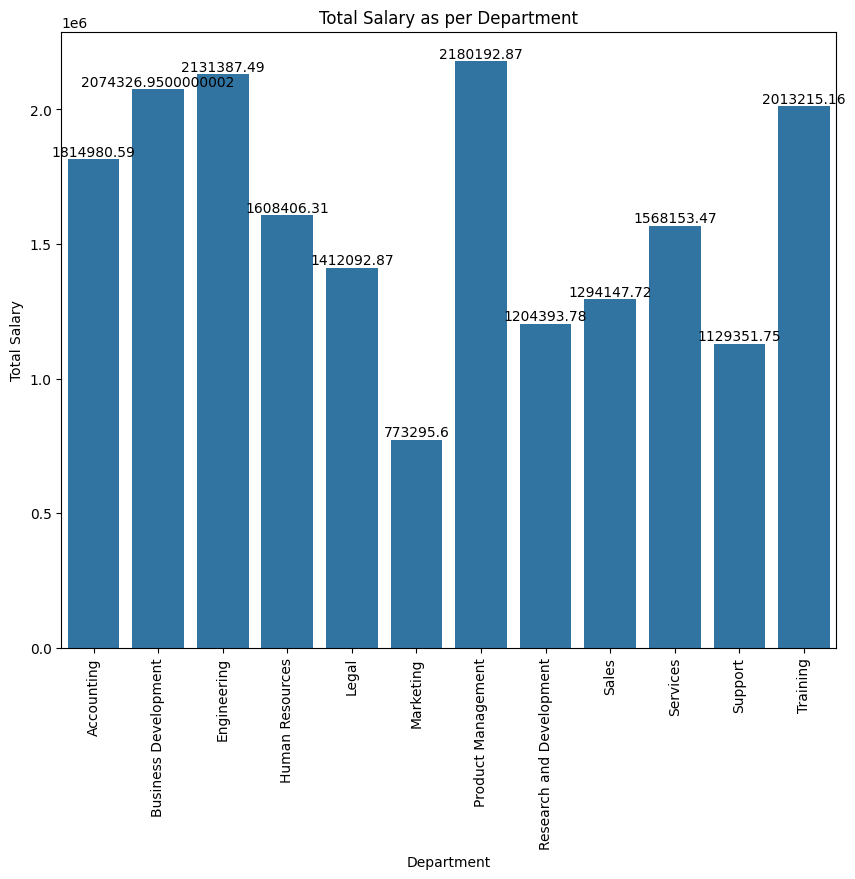

In [53]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='Department',y='Total Salary',data=salary_asper_department)
plt.title('Total Salary as per Department')
for i,bar in enumerate(ax.patches):
    count = salary_asper_department['Total Salary'][i]
    ax.text(
        bar.get_x()+bar.get_width()/2,
        bar.get_height()+bar.get_width()*0.5,
        f'{count}',
         ha='center',
      va='bottom',
      color='black'
    )
plt.xticks(rotation=90)

In [56]:
salary_asper_gender = df.groupby('Gender')['Salary'].sum().reset_index()
salary_asper_gender.columns = ['Gender','Total Salary']
salary_asper_gender

,Gender,Total Salary
0,Female,9113979.10
1,Male,9370899.84
2,Missing,719065.62


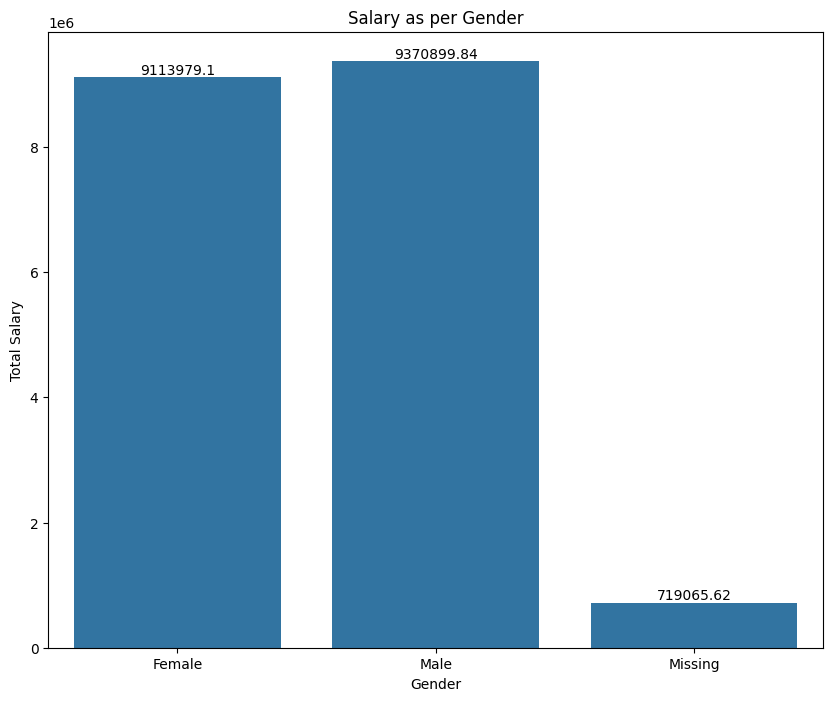

In [58]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='Gender',y='Total Salary',data=salary_asper_gender)
plt.title("Salary as per Gender")
for i,bar in enumerate(ax.patches):
  count = salary_asper_gender['Total Salary'][i]
  ax.text(
      bar.get_x() + bar.get_width() /2,
      bar.get_height() + bar.get_width()*0.5,
      f'{count}',
      ha='center',
      va='bottom',
      color='black'
  )
